# (1) Import the Libraries and the Dataset

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import the dataset
airbnb = pd.read_csv('/Users/Prescilla/Downloads/New York City Airbnb Open Data/AB_NYC_2019.csv')

In [4]:
#Check out the first 5 top rows of the dataset:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# (2) Data Cleansing

In [5]:
#Drop the host_name & last_review columns as they are not signification information for analysis
airbnb.drop(['host_name', 'last_review'], axis=1, inplace=True)

In [6]:
#Check if the columns were dropped successfully
airbnb.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
#Check out the missing value of the dataset:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Fill the missing value of reviews_per_month column with 0 value:
airbnb.fillna({'reviews_per_month': 0}, inplace=True)

In [9]:
#Check out the dataset again:
airbnb.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
#Rename the name column with property_name:
airbnb.rename(columns={'name': 'property_name'}, inplace=True)

In [11]:
#Check out the dataset again:
airbnb.head()

,id,property_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
#Check out the missing value in the dataset again:
airbnb.isnull().sum()

id                                 0
property_name                     16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

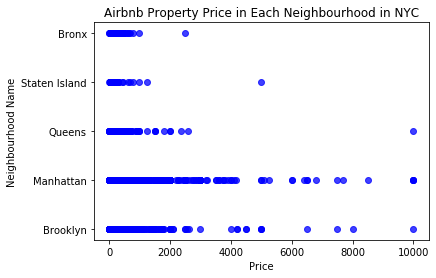

In [13]:
#Check out the outlier data in the price column of the dataset using scatter plot:
plt.scatter(x=airbnb.price, y=airbnb.neighbourhood_group, c='blue', alpha=0.75)
plt.title('Airbnb Property Price in Each Neighbourhood in NYC')
plt.xlabel('Price')
plt.ylabel('Neighbourhood Name')
plt.show()

In [16]:
#From the above graph, we can see that there are properties with price > $1000
#Pull out those properties from the dataset:
outlier = airbnb[airbnb.price > 1000]
outlier

,id,property_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0.00,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349


In [17]:
airbnb.shape

(48895, 14)

In [18]:
#Replace all the properties with price > $1000 with price of $1000
airbnb.loc[airbnb['price'] > 1000, 'price'] = 1000

In [19]:
#Verify if all the properties were replaced correctly (if no error returns then it means success)
assert airbnb['price'].max() <= 1000

In [20]:
#Check out the price column's statistical details:
airbnb.price.describe()

count    48895.000000
mean       145.477288
std        130.950025
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

In [21]:
#The dataset looks good now and is ready for EDA

# (3) Exploratory Data Analysis

In [23]:
#Check out the unique values in the neighbourhood_group column:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
#Check out the unique values in the room_type column:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [25]:
#Make a pivot table for the price of each neighbourhood_group value:
table1 = pd.pivot_table(airbnb, index='neighbourhood_group', columns='room_type', values='price',
                       aggfunc=np.mean)

In [26]:
table1

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,64.487730,59.800000
Brooklyn,171.808453,74.305567,50.527845
Manhattan,233.244185,112.235405,88.977083
Queens,144.450382,68.796856,63.717172
Staten Island,149.698864,62.292553,57.444444


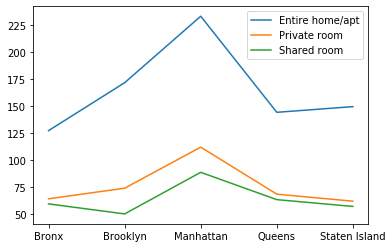

In [27]:
plt.plot(list(table1.index), table1['Entire home/apt'], label='Entire home/apt')
plt.plot(list(table1.index), table1['Private room'], label='Private room')
plt.plot(list(table1.index), table1['Shared room'], label='Shared room')
plt.legend()
plt.show()

In [51]:
#Find out the number of unique values of id and host_id columns:
print(airbnb.id.nunique())
print(airbnb.host_id.nunique())

48895
37457


In [52]:
#As there are hosts with multiple hostings, find out the top 10 hosts:
top_hosts = airbnb.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [53]:
#Prepare the dataframe for top_hosts:
top_hosts = pd.DataFrame(top_hosts)
top_hosts.reset_index(inplace=True)
top_hosts.rename(columns={'index': 'Host_ID', 'host_id': 'Property_Count'}, inplace=True)
top_hosts

,Host_ID,Property_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

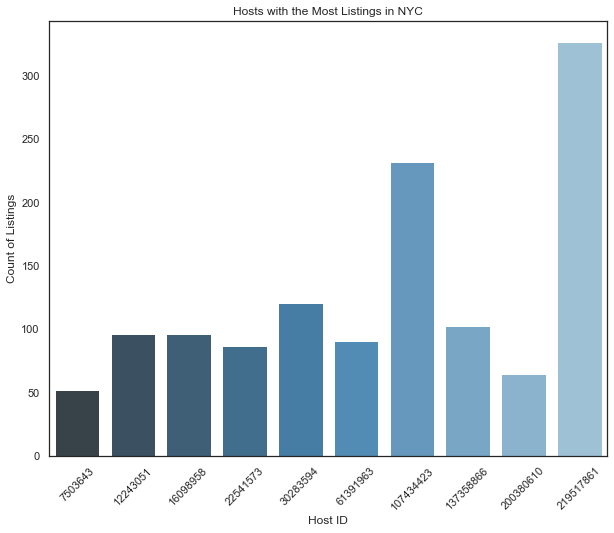

In [56]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
ax1 = sns.barplot(x='Host_ID',
           y='Property_Count',
           data=top_hosts,
           palette='Blues_d')
ax1.set_title('Hosts with the Most Listings in NYC')
ax1.set_ylabel('Count of Listings')
ax1.set_xlabel('Host ID')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

In [57]:
#Find out the top neighbourhoods in NYC:
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [58]:
#Combine the information of neighbours with the room type data
#Grab top 10 neighbourhoods for a sub-dataframe:
neighbourhood_data = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg',
                                                             'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
                                                             'Upper West Side', 'Hell\'s Kitchen',
                                                             'Upper East Side', 'Crown Heights',
                                                             'Midtown'])]

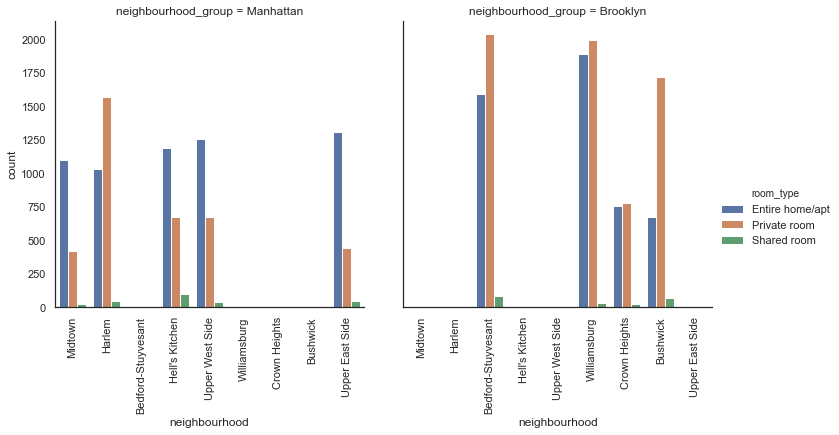

In [64]:
#Use catplot to represent the multiple neighbourhoods in graphs:
ax2 = sns.catplot(x='neighbourhood', col='neighbourhood_group', hue='room_type',
                 data=neighbourhood_data, kind='count')
ax2.set_xticklabels(rotation=90)

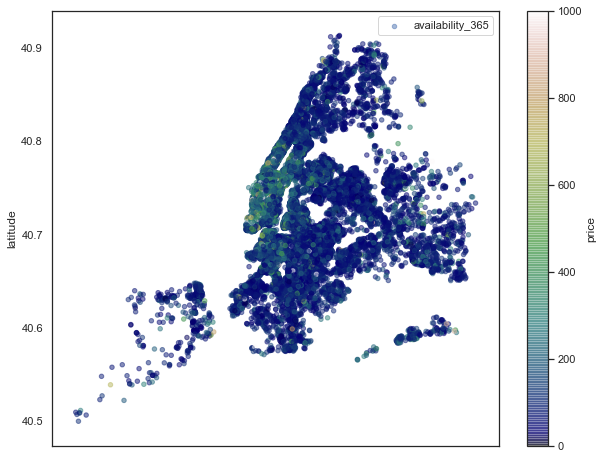

In [71]:
#Working with the given longitude and latitude columns in the dataset:
#Plot the scatter plot:
ax3 = airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                 cmap=plt.get_cmap('gist_earth'), colorbar=True, alpha=0.5, figsize=(10,8))
ax3.legend()

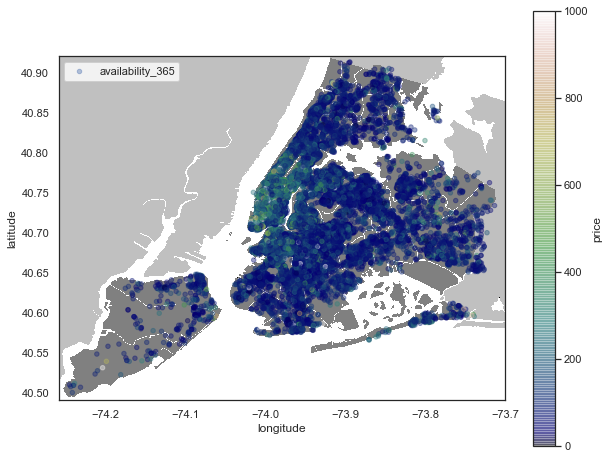

In [76]:
import urllib
#Initializing the figure size
plt.figure(figsize=(10,8))
#Loading the png NYC image found on Google
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#Using scatterplot again
airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('gist_earth'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [77]:
#Get the top 10 most reviewed listing in NYC:
top_10_reviewed_listings = airbnb.nlargest(10, 'number_of_reviews')
top_10_reviewed_listings

,id,property_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [82]:
average_price = top_10_reviewed_listings.price.mean()
print('Average price of the top 10 most reviewed listings in NYC is: ${}'.format(average_price))

Average price of the top 10 most reviewed listings in NYC is: $65.4


In [ ]:
#As we can see, price plays an important role for customers who book on Airbnb